In [1]:
import numpy as np
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sps
import peakutils
from peakutils import plot 
%matplotlib inline

In [3]:
mu = 0
mu2 = 0.5
mu3 = 0.75

In [4]:
variance = 0.5
variance2 = 1
variance3 = 1

In [5]:
sigma = math.sqrt(variance)
sigma2 = math.sqrt(variance2)
sigma3 = math.sqrt(variance3)

In [6]:
x = np.linspace(mu-3*variance,mu+3*variance, 40)
x2 = np.linspace(mu2-3*variance2, mu+3*variance2, 40)
x3 = np.linspace(mu2-3*variance3, mu+3*variance3, 40)
x

array([-1.5       , -1.42307692, -1.34615385, -1.26923077, -1.19230769,
       -1.11538462, -1.03846154, -0.96153846, -0.88461538, -0.80769231,
       -0.73076923, -0.65384615, -0.57692308, -0.5       , -0.42307692,
       -0.34615385, -0.26923077, -0.19230769, -0.11538462, -0.03846154,
        0.03846154,  0.11538462,  0.19230769,  0.26923077,  0.34615385,
        0.42307692,  0.5       ,  0.57692308,  0.65384615,  0.73076923,
        0.80769231,  0.88461538,  0.96153846,  1.03846154,  1.11538462,
        1.19230769,  1.26923077,  1.34615385,  1.42307692,  1.5       ])

In [7]:
A = np.zeros((559,1))
A[20:60] = mlab.normpdf(x, mu, sigma).reshape(40,1)
A[230:270] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
A[420:460] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
A = A.reshape(559)
A

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.05946514,  0.07445854,  0.09213549,  0.11266779,  0.13615483,
        0.16260232,  0.1919026 ,  0.2238182 ,  0.25797069,  0.29383649,
        0.33075128,  0.36792369,  0.40445889,  0.43939129,  0.47172503,
        0.50048011,  0.52474117,  0.54370569,  0.55672796,  0.5633556 ,
        0.5633556 ,  0.55672796,  0.54370569,  0.52474117,  0.50048011,
        0.47172503,  0.43939129,  0.40445889,  0.36792369,  0.33075128,
        0.29383649,  0.25797069,  0.2238182 ,  0.1919026 ,  0.16260232,
        0.13615483,  0.11266779,  0.09213549,  0.07445854,  0.05946514,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [8]:
B = np.zeros((559,1))
B[23:63] = mlab.normpdf(x, mu, sigma).reshape(40,1)
B[400:440] =  mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
B[470:510] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
B = B.reshape(559)

In [9]:
C = np.zeros((559, 1))
C[320:360] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
C[433:473] = mlab.normpdf(x, mu, sigma).reshape(40,1)
C[128:168] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
C = C.reshape(559)

In [10]:
D=np.arange(0,559)

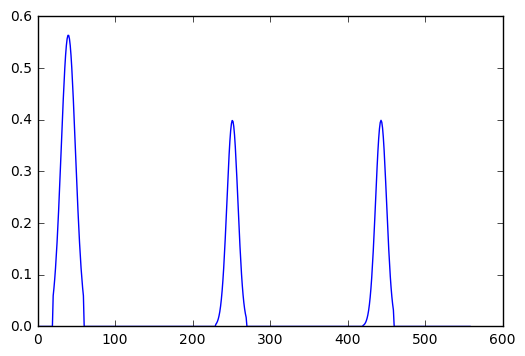

In [11]:
plt.plot(D,A)
plt.show()

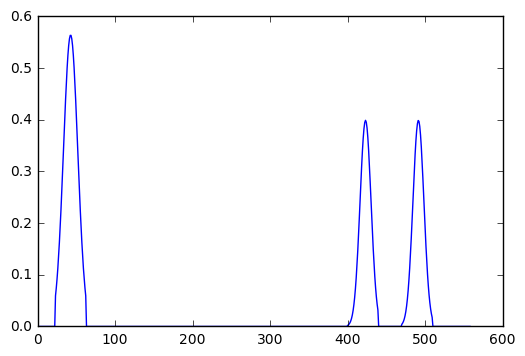

In [12]:
plt.plot(D,B)
plt.show()

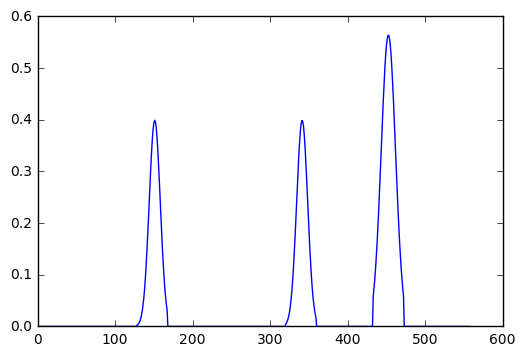

In [13]:
plt.plot(D,C)
plt.show()

In [14]:
peakindices = peakutils.indexes(A,thres=0.10, min_dist=1)
peakindices

array([ 39, 251, 443], dtype=int64)

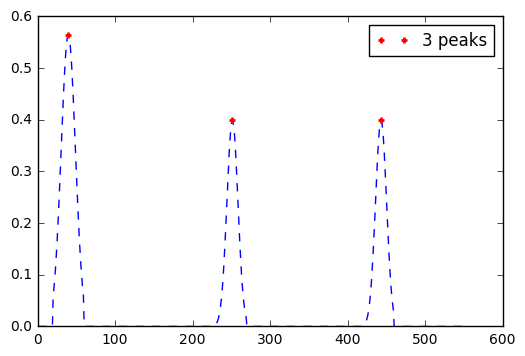

In [15]:
peakutils.plot.plot(D,A, peakindices)

In [16]:
spectralmatrix = np.zeros((256, 256, 559))
functionalmatrix = np.zeros((256, 256))
xaxis = spectralmatrix.shape[0]
yaxis = spectralmatrix.shape[1]

In [17]:
spectralmatrix = np.zeros((256, 256, 559))
functionalmatrix = np.zeros((256, 256))
xaxis = spectralmatrix.shape[0]
yaxis = spectralmatrix.shape[1]

In [18]:
np.random.seed(122)
a=np.random.rand(1)
b=np.random.rand(1)
c=np.random.rand(1)

In [19]:
for x in range(xaxis):
    for y in range(yaxis):
            spectralmatrix[x][y] = (a*x**2 + b*y**2 + c*x*y)

In [20]:
#peakindices = peakutils.indexes(spectralmatrix[:,1], thres=0.10, min_dist=1)

In [21]:
from relativepeakintensities_varun import TotIntensity
from relativepeakintensities_varun import RelIntensities

In [24]:
p=TotIntensity(A, thres=0.10, min_dist=1)

In [25]:
q=RelIntensities(A, peakindices[0], peakindices[1])

In [29]:
for x in range(xaxis):
    for y in range(yaxis):
            functionalmatrix[x][y] = (p*x**2 + q*y**(1/2) + q*p*x*y)

In [34]:
functionalmatrix

array([[  0.00000000e+00,   1.41316793e+00,   1.99852126e+00, ...,
          2.24778120e+01,   2.25221908e+01,   2.25664822e+01],
       [  1.36093700e+00,   4.69733746e+00,   7.20592331e+00, ...,
          5.10416578e+02,   5.12384189e+02,   5.14351713e+02],
       [  5.44374799e+00,   1.07033810e+01,   1.51351994e+01, ...,
          1.00107722e+03,   1.00496806e+03,   1.00885882e+03],
       ..., 
       [  8.71122163e+04,   8.76002073e+04,   8.80873705e+04, ...,
          2.10238885e+05,   2.10725507e+05,   2.11212129e+05],
       [  8.78022114e+04,   8.82921256e+04,   8.87812120e+04, ...,
          2.11415458e+05,   2.11904003e+05,   2.12392549e+05],
       [  8.84949283e+04,   8.89867658e+04,   8.94777754e+04, ...,
          2.12594752e+05,   2.13085221e+05,   2.13575690e+05]])